In [175]:
%matplotlib inline
import os
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
import geopandas as gpd

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

In [2]:
notebook_path = os.path.abspath("Notebook.ipynb")
project_path = Path(notebook_path).parent.parent

data_path = os.path.join(project_path, 'data')
external_data_path = os.path.join(data_path, 'external', '')
processed_data_path = os.path.join(data_path, 'processed', '')

---

# Maps

In [4]:
datafile = os.path.join(processed_data_path, 'covid_countries.csv')
shapefile = os.path.join(external_data_path, 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [210]:
colors = 9
cmap = 'Reds'
figsize = (16, 10)
start = '2020-01-22'
end = '2020-04-27'
confirmed = 'confirmed'
death = 'death'

plot_date = end
case_type = death
title = 'Cumulative COVID-19 Death Cases (per 100K) by {}'.format(plot_date)
description = '''
Individuals who have used the Internet from any location in the last 3 months via any device based on the International Telecommunication Union,
World Telecommunication/ICT Development Report and database. Data: World Bank - worldbank.org • Author: Ramiro Gómez - ramiro.org'''.strip()

In [189]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADM0_A3,geometry
87,DJI,"POLYGON ((4060986.044 1228648.742, 4056426.151..."
70,ARM,"MULTIPOLYGON (((3891993.150 4413322.020, 38964..."
50,DEU,"MULTIPOLYGON (((1142439.172 5198976.864, 11402..."
124,BDI,"POLYGON ((2885636.262 -256751.717, 2882472.864..."
248,PGA,"MULTIPOLYGON (((10847213.065 1094919.625, 1084..."


In [211]:
df = pd.read_csv(datafile)[['DisplayName','ISO3Code', 'Continent', 'Date',
       'CaseType', 'CumulativeReportedCases', 'CumulativeReportedCasesPer100K']]
df.sample(5)

,DisplayName,ISO3Code,Continent,Date,CaseType,CumulativeReportedCases,CumulativeReportedCasesPer100K
39214,Singapore,SGP,Asia,2020-03-08,death,0,0.000000
11158,Latvia,LVA,Europe,2020-03-02,confirmed,1,0.051855
10260,Japan,JPN,Asia,2020-03-22,confirmed,1101,0.865551
51498,Channel Islands,GGY,Europe,2020-04-21,recovered,256,154.216867
5651,Dominican Republic,DOM,North America,2020-03-03,confirmed,1,0.009410


In [212]:
# Select case type
df = df[df['CaseType'] == case_type]

# Select date
df = df[df['Date'] == plot_date]

In [213]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='ISO3Code')
merged.describe()

,CumulativeReportedCases,CumulativeReportedCasesPer100K
count,201.000000,201.000000
mean,1066.731343,4.027528
std,5279.357979,12.468471
min,0.000000,0.000000
25%,1.000000,0.025288
50%,11.000000,0.243161
75%,99.000000,1.840336
max,56259.000000,121.359223


In [214]:
merged.head()

,ADM0_A3,geometry,DisplayName,ISO3Code,Continent,Date,CaseType,CumulativeReportedCases,CumulativeReportedCasesPer100K
0,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,IDN,Asia,2020-04-27,death,765,0.285799
1,MYS,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Malaysia,MYS,Asia,2020-04-27,death,99,0.314006
2,CHL,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Chile,CHL,South America,2020-04-27,death,198,1.057175
3,BOL,"POLYGON ((-6477059.899 -1872360.838, -6477072....",Bolivia,BOL,South America,2020-04-27,death,53,0.466831
4,PER,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Peru,PER,South America,2020-04-27,death,782,2.444570


In [215]:
merged.describe()

,CumulativeReportedCases,CumulativeReportedCasesPer100K
count,201.000000,201.000000
mean,1066.731343,4.027528
std,5279.357979,12.468471
min,0.000000,0.000000
25%,1.000000,0.025288
50%,11.000000,0.243161
75%,99.000000,1.840336
max,56259.000000,121.359223


In [216]:
# set range for the choropleth values
vmin, vmax = merged['CumulativeReportedCasesPer100K'].min(), merged['CumulativeReportedCasesPer100K'].max()

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


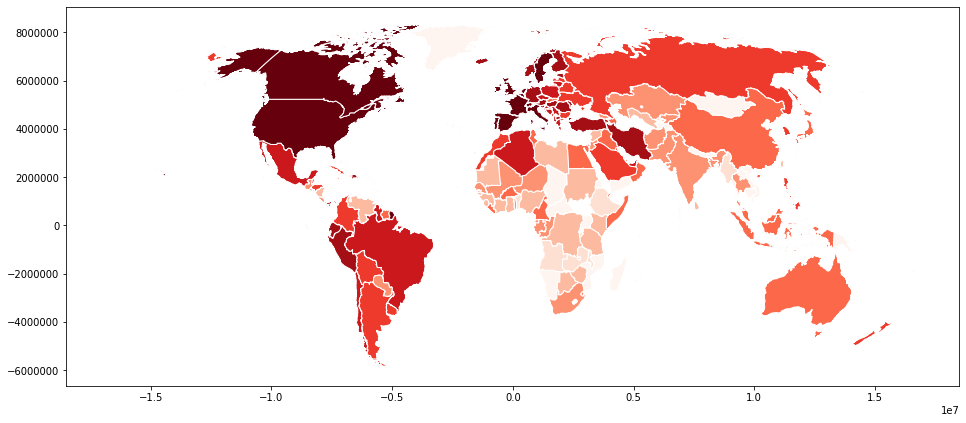

In [217]:
# Mapping the data
fig, ax = plt.subplots(1,1, figsize=figsize)

ax = merged.dropna().plot(column='CumulativeReportedCasesPer100K', categorical=True, cmap=cmap, scheme='QUANTILES', 
                          edgecolor='white',
                          k=colors,
                         legend=False,
                          ax=ax,
                          missing_kwds={'color': 'lightgrey'}
                         )

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


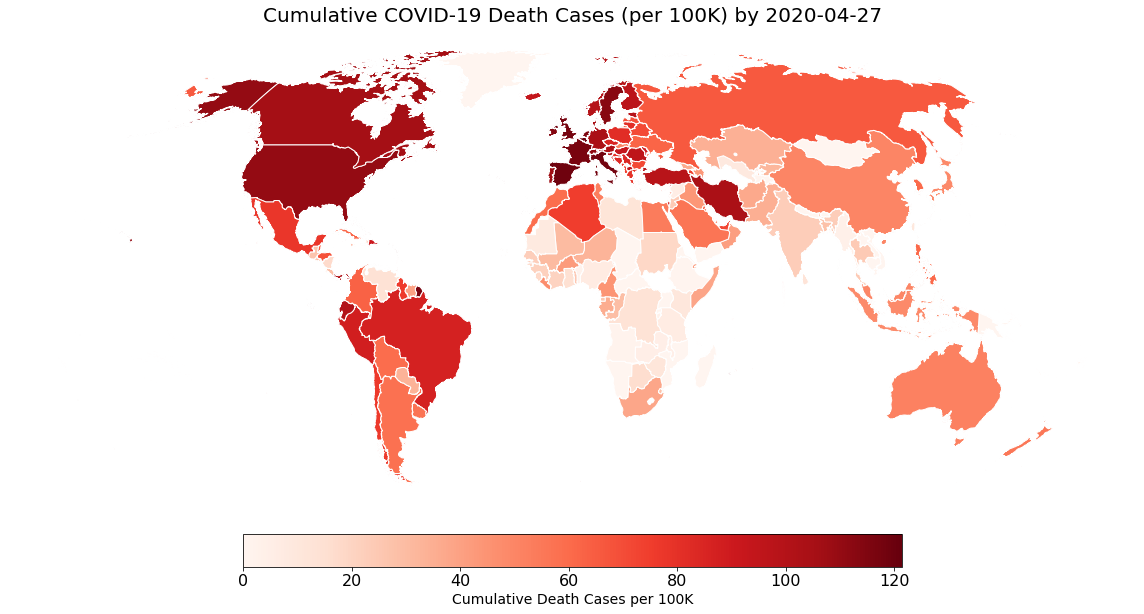

In [219]:
#merged[merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
# Mapping the data
# Mapping the data
fig, ax = plt.subplots(1,1, figsize=figsize)

ax = merged.dropna().plot(column='CumulativeReportedCasesPer100K', categorical=True, cmap=cmap, 
                          edgecolor='white',
                          k=colors,
                         legend=False,
                          ax=ax,
                          missing_kwds={'color': 'lightgrey'}
                         )
#ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

#cax = fig.add_axes([0.15, 0, 0.75, 0.035])
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
cbr = fig.colorbar(sm, orientation='horizontal', fraction=0.05, pad=0.04)#)#, pad=0.2, aspect=30)
cbr.ax.tick_params(labelsize=16) 
cbr.set_label('Cumulative Death Cases per 100K', fontsize=14)

ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
#ax.set_ylim(0,2e5)
#ax.get_legend().set_bbox_to_anchor((.12, .4))
#plt.legend(loc='lower left', mode='expand', ncol=4)
plt.title(title, fontsize=20)
plt.tight_layout()
plt.savefig('world_death_27042020.pdf', dpi=150)
plt.close(fig)
ax.get_figure()

---

# Normierung auf Maßnahme EU

In [377]:
df = pd.read_csv(datafile)
#[['DisplayName','ISO3Code', 'Continent', 'Date',
#       'CaseType', 'CumulativeReportedCases', 'CumulativeReportedCasesPer100K']]
df.sample(5)

,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
8036,Greenland,Greenland,71.7069,-42.6043,GL,GRL,304,56565.0,North America,2020-04-11,confirmed,0,11,0.000000,19.446654,1.000000,1.000000,inf
4628,Costa Rica,Costa Rica,9.7489,-83.7534,CR,CRI,188,4999443.0,North America,2020-02-29,confirmed,0,0,0.000000,0.000000,0.000000,0.000000,-0.000000
13932,Nepal,Nepal,28.1667,84.2500,NP,NPL,524,28095712.0,Asia,2020-03-22,confirmed,0,1,0.000000,0.003559,1.000000,1.000000,inf
33205,Lithuania,Lithuania,55.1694,23.8813,LT,LTU,440,2801270.0,Europe,2020-03-17,death,0,0,0.000000,0.000000,0.000000,0.000000,-0.000000
6296,Estonia,Estonia,58.5953,25.0136,EE,EST,233,1322913.0,Europe,2020-04-05,confirmed,58,1097,4.384264,82.923064,1.055823,1.070933,10.114437


In [378]:
df.columns

Index(['Country', 'DisplayName', 'Latitude', 'Longitude', 'ISO2Code',
       'ISO3Code', 'ISONumCode', 'TotalPopulation', 'Continent', 'Date',
       'CaseType', 'DailyReportedCases', 'CumulativeReportedCases',
       'DailyReportedCasesPer100K', 'CumulativeReportedCasesPer100K',
       'GrowthFactor', 'GF_RollingGeomMean', 'DoublingTime'],
      dtype='object')

In [549]:
# Select only European Countries
df = df[df['Continent'] == 'Europe']

In [511]:
eu_list = list(df['ISO3Code'].unique())

In [464]:
response_data = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')
response_data.tail(5)

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
18867,Vietnam,VNM,20200504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,271.0,0.0,NaN,78.31,NaN,87.14
18868,South Africa,ZAF,20200504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6783.0,131.0,NaN,91.40,NaN,92.38
18869,Zambia,ZMB,20200504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,124.0,3.0,NaN,62.45,NaN,60.95
18870,Zimbabwe,ZWE,20200504,3.0,1.0,3.0,1.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,34.0,4.0,82.27,82.27,92.38,92.38
18871,Taiwan,TWN,20200504,0.0,NaN,0.0,NaN,1.0,1.0,0.0,...,2.0,0.0,0.0,NaN,436.0,6.0,29.36,29.36,35.24,35.24


In [465]:
rdf = response_data.loc[response_data['CountryCode'].isin(eu_list)]

In [466]:
rdf.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'LegacyStringencyIndex',
       'LegacyStringencyIndexForDisplay'],
      dtype='object')

In [467]:
rdf = rdf[['CountryName', 'CountryCode', 'Date', 'C6_Stay at home requirements']]

In [468]:
rdf['Date'] = rdf['Date'].astype(str)

In [469]:
rdf.drop(['CountryName'], axis=1, inplace=True)

In [470]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4249 entries, 3 to 18862
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CountryCode                   4249 non-null   object 
 1   Date                          4249 non-null   object 
 2   C6_Stay at home requirements  3318 non-null   float64
dtypes: float64(1), object(2)
memory usage: 132.8+ KB


In [471]:
rdf

,CountryCode,Date,C6_Stay at home requirements
3,ALB,20200101,0.0
4,AND,20200101,NaN
8,AUT,20200101,0.0
11,BEL,20200101,0.0
14,BGR,20200101,NaN
...,...,...,...
18847,SRB,20200504,NaN
18849,SVK,20200504,NaN
18850,SVN,20200504,NaN
18851,SWE,20200504,NaN


In [ ]:
# For each country
for country in rdf['CountryCode'].unique():
    # Get rows where C6 > 1
    d = rdf[rdf['CountryCode'] == country]
    
    # Get first row

In [268]:
unmelted = pd.pivot(rdf, index='CountryCode', columns='Date')
unmelted['C6_Stay at home requirements'].reset_index()
unmelted.columns.name = None

In [272]:
unmelted = unmelted.xs('C6_Stay at home requirements', axis=1, drop_level=True)

In [274]:
unmelted = unmelted.transpose()

In [276]:
unmelted.index = pd.to_datetime(unmelted.index)

In [277]:
unmelted.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [339]:
unmelted.reset_index(inplace=True)

In [301]:
unmelted.replace(0, np.nan, inplace=True)

In [360]:
codes

['ALB',
 'AND',
 'AUT',
 'BEL',
 'BGR',
 'BIH',
 'CHE',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'GBR',
 'GRC',
 'HRV',
 'HUN',
 'IRL',
 'ISL',
 'ITA',
 'LUX',
 'MDA',
 'NLD',
 'NOR',
 'POL',
 'PRT',
 'ROU',
 'SMR',
 'SRB',
 'SVK',
 'SVN',
 'SWE',
 'UKR']

In [361]:
cols = [c for c in unmelted if c!='Date']

codes = []
dates = []

for col in cols:
    first = unmelted.loc[:, col].first_valid_index()
    codes.append(col)
    dates.append(unmelted.iloc[:first, 0])
    unmelted.iloc[:first, 0]
    
    
final = dict(zip(codes, dates))
#final

In [367]:
codes

['ALB',
 'AND',
 'AUT',
 'BEL',
 'BGR',
 'BIH',
 'CHE',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'GBR',
 'GRC',
 'HRV',
 'HUN',
 'IRL',
 'ISL',
 'ITA',
 'LUX',
 'MDA',
 'NLD',
 'NOR',
 'POL',
 'PRT',
 'ROU',
 'SMR',
 'SRB',
 'SVK',
 'SVN',
 'SWE',
 'UKR']

In [ ]:
d.loc[df['Date'] == timestamp, ]

In [512]:
#df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 102 to 20603
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         4896 non-null   object 
 1   DisplayName                     4896 non-null   object 
 2   Latitude                        4896 non-null   float64
 3   Longitude                       4896 non-null   float64
 4   ISO2Code                        4896 non-null   object 
 5   ISO3Code                        4896 non-null   object 
 6   ISONumCode                      4896 non-null   int64  
 7   TotalPopulation                 4896 non-null   float64
 8   Continent                       4896 non-null   object 
 9   Date                            4896 non-null   object 
 10  CaseType                        4896 non-null   object 
 11  DailyReportedCases              2538 non-null   float64
 12  CumulativeReportedCases        

In [334]:
import datetime

In [330]:
#df['Date'] = df['Date'].dt.date

In [537]:
#s.map(lambda x: x.strftime('%d-%m-%Y'))

for code, timestamp in final.items():
    d = df[df['ISO3Code']==code]
    #print(type(datetime.date(timestamp)))
    #df_n = d.loc[datetime.datetime.strptime(df['Date'], '%Y-%m-%d') < datetime.datetime.strptime(datetime.date(timestamp), '%Y-%m-%d')]

In [539]:
df = d

In [362]:
start = {
    'ALB': '2020-03-12',
    'AND': '2020-03-12',
    'AUT': '2020-03-05',
    'BEL': '2020-03-17',
    'BGR': '2020-04-09',
    'BIH': '2020-03-19',
    'CHE': '2020-03-16',
    'CZE': '2020-03-14',
    'DEU': '2020-03-08',
    'DNK': '2020-03-02',
    'ESP': '2020-03-13',
    'EST': '2020-03-28',
    'FIN': '2020-03-15',
    'FRA': '2020-03-16',
    'GBR': '2020-03-22',
    'GRC': '2020-03-22',
    'HRV': '2020-03-22',
    'HUN': '2020-03-27',
    'IRL': '2020-03-25',
    'ISL': '2020-05-04',
    'ITA': '2020-02-22',
    'LUX': '2020-03-16',
    'MDA': '2020-03-23',
    'NLD': '2020-03-11',
    'NOR': '2020-05-04',
    'POL': '2020-03-30',
    'PRT': '2020-04-17',
    'ROU': '2020-03-11',
    'SMR': '2020-04-16',
    'SRB': '2020-03-14',
    'SVK': '2020-03-11',
    'SVN': '2020-03-13',
    'SWE': '2020-05-04',
    'UKR': '2020-03-19'
}

In [550]:
df = df[df['CaseType'] == 'confirmed']
#df[df['Date'].eq(start['ALB']).groupby(df[''])]

In [551]:
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
column_vals = ['DailyReportedCases', 'CumulativeReportedCases',
       'DailyReportedCasesPer100K', 'CumulativeReportedCasesPer100K',
       'GrowthFactor', 'GF_RollingGeomMean', 'DoublingTime']
df.columns

Index(['Country', 'DisplayName', 'Latitude', 'Longitude', 'ISO2Code',
       'ISO3Code', 'ISONumCode', 'TotalPopulation', 'Continent', 'Date',
       'CaseType', 'DailyReportedCases', 'CumulativeReportedCases',
       'DailyReportedCasesPer100K', 'CumulativeReportedCasesPer100K',
       'GrowthFactor', 'GF_RollingGeomMean', 'DoublingTime'],
      dtype='object')

In [400]:
#df[df['ISO3Code'] == 'ALB'].loc['2020-03-12']
df[(df['ISO3Code'] == 'ALB') & (df['Date'] < '2020-03-12')][column_vals].replace(range(0, len(column_vals), np.nan))

TypeError: 'float' object cannot be interpreted as an integer

In [395]:
df[(df['ISO3Code'] == 'ALB') & (df['Date'] < '2020-03-12')].replace(0, np.nan, inplace=True)

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [402]:
start.items()

dict_items([('ALB', '2020-03-12'), ('AND', '2020-03-12'), ('AUT', '2020-03-05'), ('BEL', '2020-03-17'), ('BGR', '2020-04-09'), ('BIH', '2020-03-19'), ('CHE', '2020-03-16'), ('CZE', '2020-03-14'), ('DEU', '2020-03-08'), ('DNK', '2020-03-02'), ('ESP', '2020-03-13'), ('EST', '2020-03-28'), ('FIN', '2020-03-15'), ('FRA', '2020-03-16'), ('GBR', '2020-03-22'), ('GRC', '2020-03-22'), ('HRV', '2020-03-22'), ('HUN', '2020-03-27'), ('IRL', '2020-03-25'), ('ISL', '2020-05-04'), ('ITA', '2020-02-22'), ('LUX', '2020-03-16'), ('MDA', '2020-03-23'), ('NLD', '2020-03-11'), ('NOR', '2020-05-04'), ('POL', '2020-03-30'), ('PRT', '2020-04-17'), ('ROU', '2020-03-11'), ('SMR', '2020-04-16'), ('SRB', '2020-03-14'), ('SVK', '2020-03-11'), ('SVN', '2020-03-13'), ('SWE', '2020-05-04'), ('UKR', '2020-03-19')])

In [495]:
df[(df['ISO3Code'] == 'FIN') & (df['Date'] < '2020-03-15')].loc[:, column_vals] = 0

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [496]:
df[(df['ISO3Code'] == 'FIN') & (df['Date'] < '2020-03-15')]

,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
6834,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-22,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6835,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-23,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6836,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-24,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6837,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-25,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6838,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-26,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6839,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-27,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-28,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6841,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-29,confirmed,1.0,1.0,0.018107,0.018107,inf,NaN,NaN
6842,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-30,confirmed,NaN,1.0,NaN,0.018107,1.000000,NaN,NaN
6843,Finland,Finland,64.0,26.0,FI,FIN,246,5522585.0,Europe,2020-01-31,confirmed,NaN,1.0,NaN,0.018107,1.000000,NaN,NaN


In [542]:
for key, val in start.items():
    df[(df['ISO3Code'] == key) & (df['Date'] < val)].loc[:, column_vals] = 0

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [498]:
df.replace(0, np.nan, inplace=True)

In [553]:
df

,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
20298,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-01-22,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20299,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-01-23,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20300,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-01-24,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20301,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-01-25,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20302,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-01-26,confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-04-28,confirmed,401.0,9410.0,0.906293,21.267383,1.044511,1.063263,11.299711
20396,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-04-29,confirmed,456.0,9866.0,1.030598,22.297981,1.048459,1.059297,12.032680
20397,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-04-30,confirmed,540.0,10406.0,1.220445,23.518426,1.054733,1.054652,13.026392
20398,Ukraine,Ukraine,48.3794,31.1656,UA,UKR,804,44246158.0,Europe,2020-05-01,confirmed,455.0,10861.0,1.028338,24.546764,1.043725,1.051401,13.828768


In [475]:
df.columns

Index(['Country', 'DisplayName', 'Latitude', 'Longitude', 'ISO2Code',
       'ISO3Code', 'ISONumCode', 'TotalPopulation', 'Continent', 'Date',
       'CaseType', 'DailyReportedCases', 'CumulativeReportedCases',
       'DailyReportedCasesPer100K', 'CumulativeReportedCasesPer100K',
       'GrowthFactor', 'GF_RollingGeomMean', 'DoublingTime'],
      dtype='object')

In [545]:
cum_rep = df[['Date', 'DisplayName', 'CumulativeReportedCases']]
cum_rep

,Date,DisplayName,CumulativeReportedCases
20298,2020-01-22,Ukraine,NaN
20299,2020-01-23,Ukraine,NaN
20300,2020-01-24,Ukraine,NaN
20301,2020-01-25,Ukraine,NaN
20302,2020-01-26,Ukraine,NaN
...,...,...,...
20395,2020-04-28,Ukraine,9410.0
20396,2020-04-29,Ukraine,9866.0
20397,2020-04-30,Ukraine,10406.0
20398,2020-05-01,Ukraine,10861.0


In [546]:
#cum_rep.reset_index(inplace=True)
#pd.pivot(cum_rep, index='DisplayName', columns='Date')
#cum_rep.reset_index()
#unmelted.columns.name = None
cum_rep = pd.pivot(cum_rep, columns='DisplayName', values='CumulativeReportedCases')
#cum_rep

In [547]:
cum_rep

DisplayName,Ukraine
20298,NaN
20299,NaN
20300,NaN
20301,NaN
20302,NaN
...,...
20395,9410.0
20396,9866.0
20397,10406.0
20398,10861.0


In [534]:
cum_rep = cum_rep.reset_index()

In [507]:
for col in cum_rep.columns:
    cum_rep[col] = cum_rep[col].shift(-cum_rep[col].first_valid_index())
# check out head

In [535]:
cum_rep = cum_rep.drop(['index'], axis=1)
cum_rep.tail()

DisplayName,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Channel Islands,Croatia,Czechia,...,Romania,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
4891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161145.0
4892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165221.0
4893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171253.0
4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177454.0
4895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182260.0


In [530]:
cum_rep

DisplayName,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Channel Islands,Croatia,Czechia,...,Romania,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.841122
4892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.755987
4893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.533703
4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.819415


Text(0.5, 1.0, 'Total reported coronavirus deaths for places with at least 25 deaths')

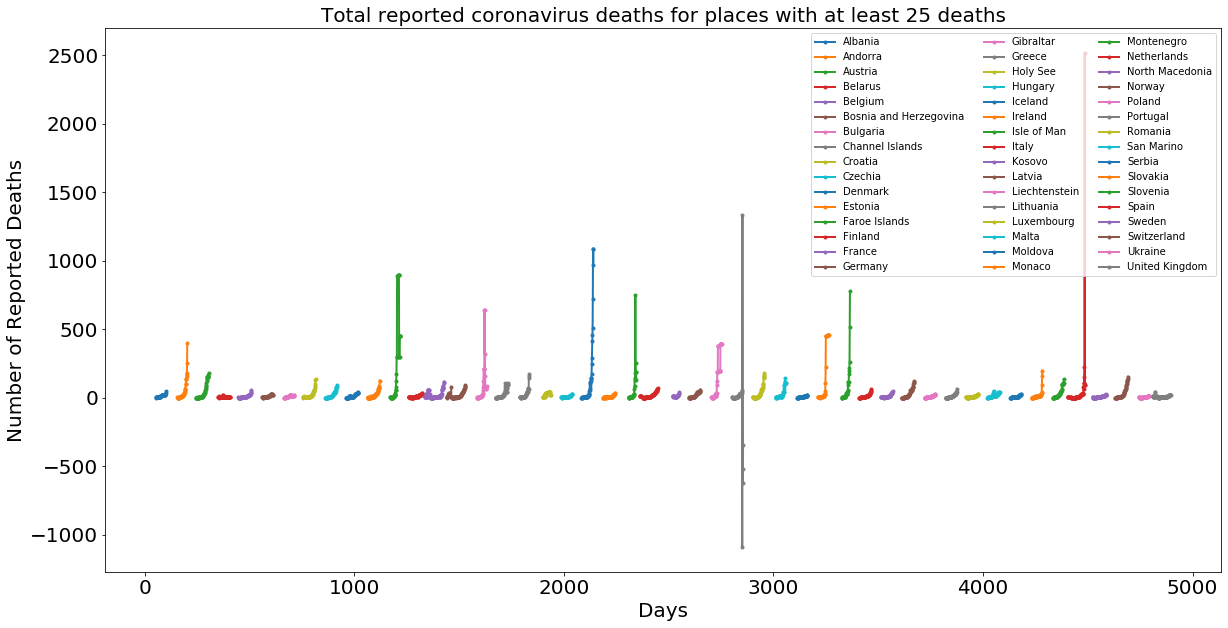

In [531]:
ax = cum_rep.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20)

In [272]:
unmelted = unmelted.xs('C6_Stay at home requirements', axis=1, drop_level=True)

In [274]:
unmelted = unmelted.transpose()

In [276]:
unmelted.index = pd.to_datetime(unmelted.index)

In [277]:
unmelted.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [339]:
unmelted.reset_index(inplace=True)

---

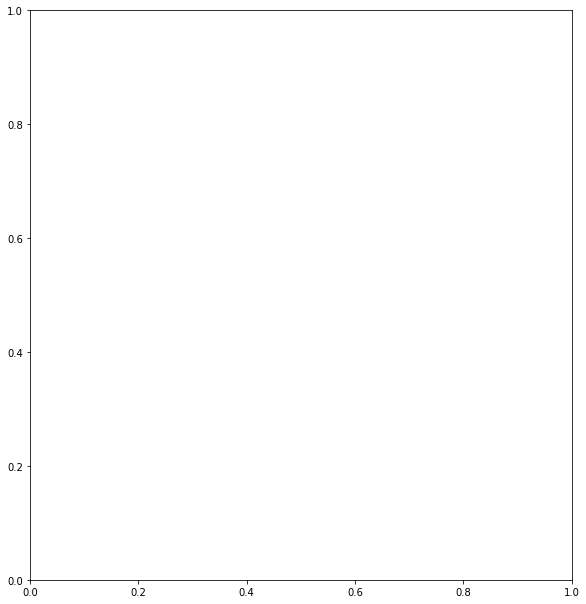

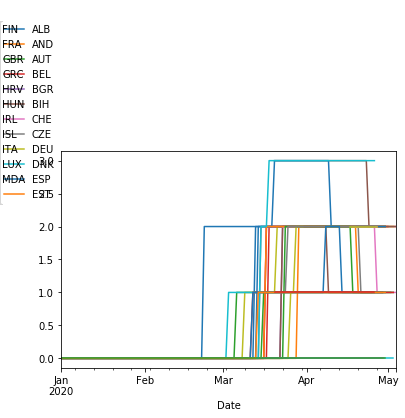

In [299]:
fig = plt. figure(figsize=(11,8.5))
plt.subplot(111)

unmelted.plot()
#ax.legend(loc)
plt.legend(loc='center left', bbox_to_anchor=(0,0.5), borderaxespad=0,
                bbox_transform=fig.transFigure, mode='expand', ncol=3)

fig.subplots_adjust(right=0.75) 
fig.tight_layout(rect=[0,0,0.75,1])
plt.show()